In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 7.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=499c0ce21647f58a9d4f37789ddb9a7b235053ece72456c63fd6bca923f35efd
  Stored in directory: /home/codespace/.cache/pip/wheels/95/13/41/f7f135ee114175605fb4f0a89e7389f3742aa6c1e1a5bcb657
Successfully built pyspark


In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Spark Basics').getOrCreate()

24/07/18 01:38:50 WARN Utils: Your hostname, codespaces-fb7010 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
24/07/18 01:38:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/18 01:38:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
df = spark.read.csv('student.csv' , header=True , inferSchema=True)

In [6]:
df

DataFrame[school: string, sex: string, age: int, address: string, famsize: string, Pstatus: string, Medu: string, Fedu: string, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: string, studytime: string, failures: int, schoolsup: string, famsup: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: string, freetime: string, goout: string, Dalc: string, Walc: string, health: string, absences: int, G1: int, G2: int, G3: int]

In [7]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: string (nullable = true)
 |-- Fedu: string (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: string (nullable = true)
 |-- studytime: string (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: string (nullable = true)
 |-- freetime: string (nullable = true)
 |-- goout: string (nullable = 

In [8]:
# Drop the rows with missing values
df.na.drop().show()

24/07/18 01:38:59 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|    reason|guardian|       traveltime|    studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|    Dalc|    Walc|   health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|    higher education|    higher educati

In [9]:
df.na.drop(thresh=2).show()

+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|    reason|guardian|       traveltime|    studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|    Dalc|    Walc|   health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|    higher education|    higher educati

In [10]:

df.na.drop(how='all').show()

+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|    reason|guardian|       traveltime|    studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|    Dalc|    Walc|   health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|    higher education|    higher educati

In [11]:
df.describe().show()

24/07/18 01:39:04 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+-------+------+----+------------------+-------+-------+-------+-------------------+-------------------+-------+-------+----------+--------+-------------+------------+------------------+---------+------+----+----------+-------+------+--------+--------+---------+--------+--------+--------+--------+---------+-----------------+------------------+------------------+------------------+
|summary|school| sex|               age|address|famsize|Pstatus|               Medu|               Fedu|   Mjob|   Fjob|    reason|guardian|   traveltime|   studytime|          failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel|freetime|   goout|    Dalc|    Walc|   health|         absences|                G1|                G2|                G3|
+-------+------+----+------------------+-------+-------+-------+-------------------+-------------------+-------+-------+----------+--------+-------------+------------+------------------+---------+------+----+----------+-------+-----

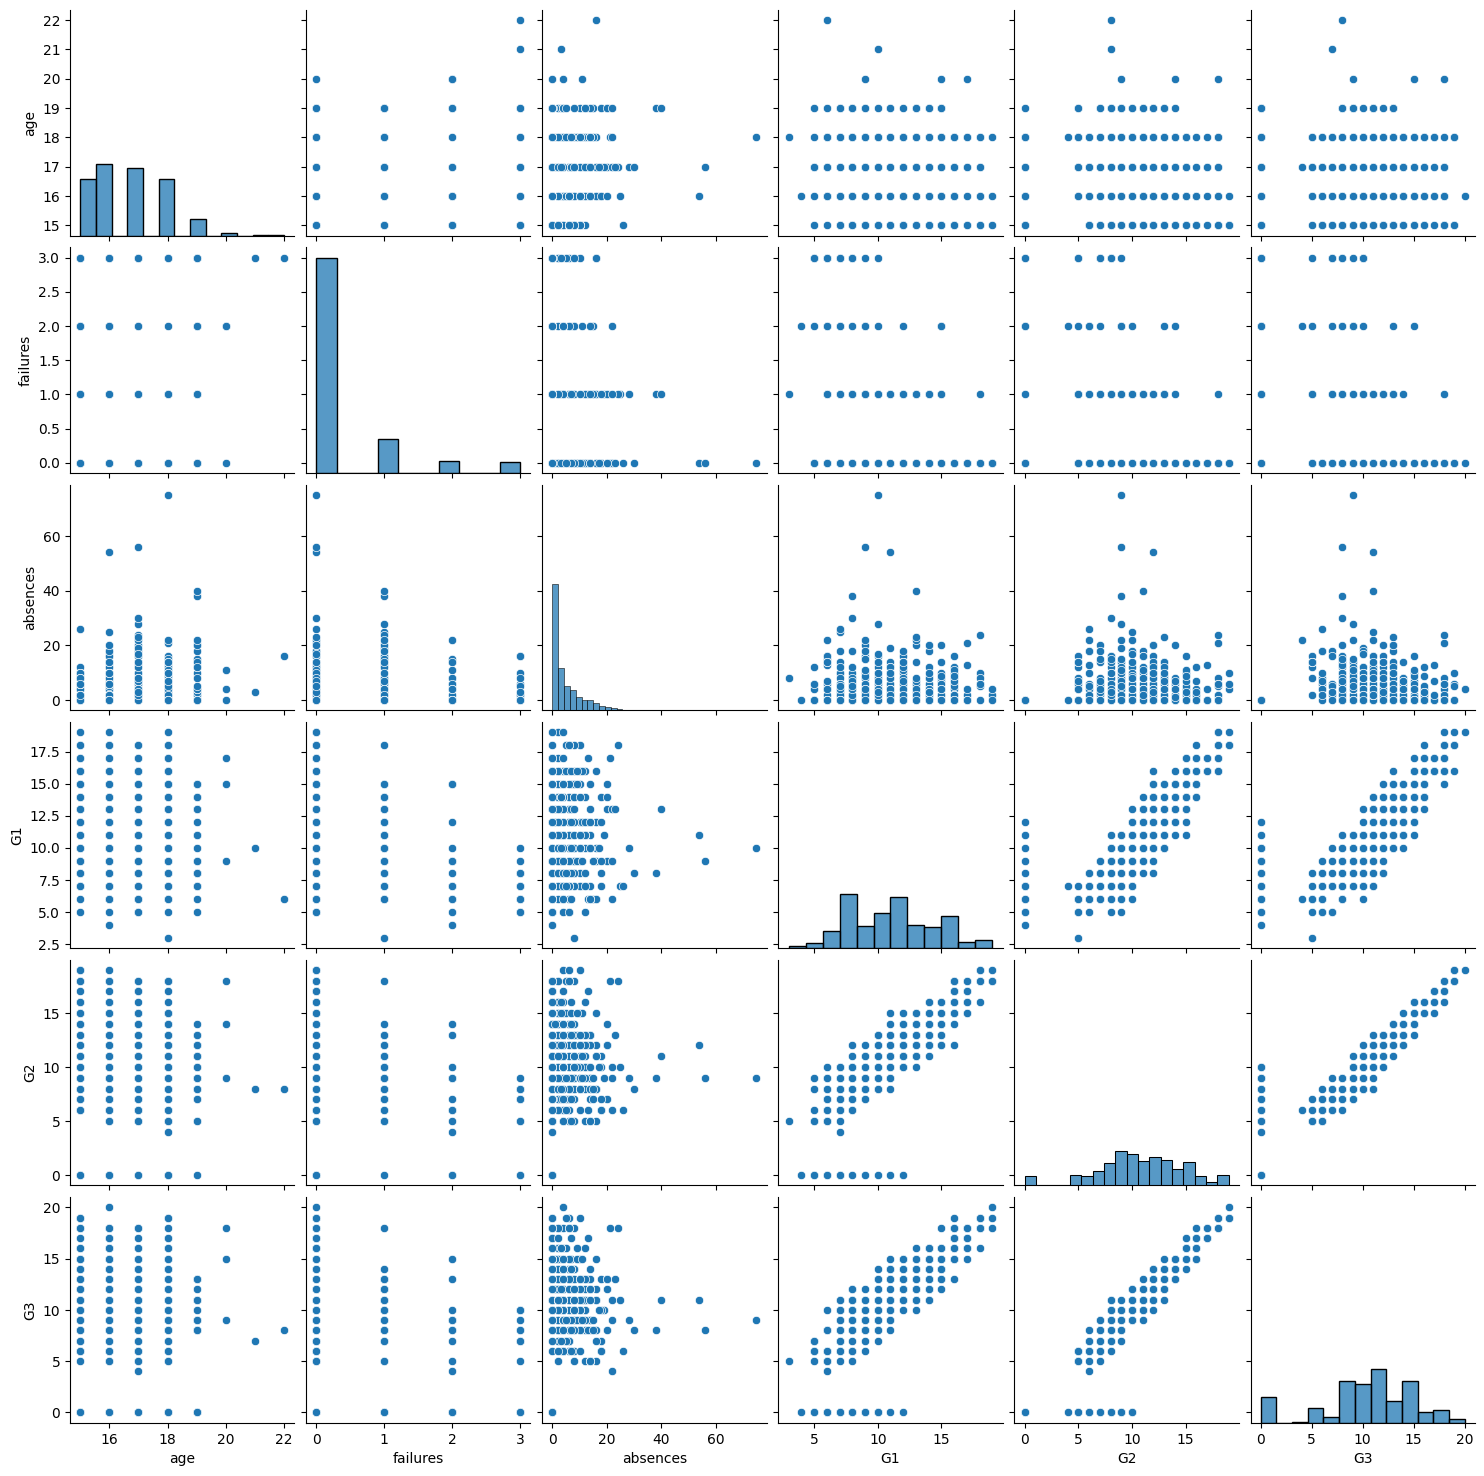

In [12]:
# Some visualization from the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df.toPandas())     # toPandas() is used to convert the spark dataframe to pandas dataframe
plt.show()

In [13]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=['age'], outputCols=['age']).setStrategy('mean')

In [14]:
imputer.fit(df).transform(df).show()

+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|    reason|guardian|       traveltime|    studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|    Dalc|    Walc|   health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+----------+--------+-----------------+-------------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+--------+--------+---------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|    higher education|    higher educati

## Filters

In [15]:
df.filter(df['age'] > 20).show()

+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+---------+---------+--------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|     Dalc|     Walc|  health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+---------+---------+--------+--------+---+---+---+
|    GP|  M| 22|      U|    GT3|      T| secondary education|primary education...|services|services| other|  mother|  <15

In [16]:
df.filter((df['age'] > 20) & (df['age'] < 30)).show()

+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+---------+---------+--------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|                Medu|                Fedu|    Mjob|    Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|   famrel| freetime|    goout|     Dalc|     Walc|  health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+--------------------+--------------------+--------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+---------+---------+---------+---------+---------+--------+--------+---+---+---+
|    GP|  M| 22|      U|    GT3|      T| secondary education|primary education...|services|services| other|  mother|  <15

In [17]:
data = [("John", 25), ("Anna", 22), ("Mike", 30)]
rdd = spark.sparkContext.parallelize(data)

In [21]:
result = rdd.collect()
print(result)

[('John', 25), ('Anna', 22), ('Mike', 30)]
